# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [1]:
import pandas as pd

df = pd.read_csv(r'/Users/liz/Documents/Master Data Science/Introduction to Data Science/Week 5/churn_data.csv', index_col='customerID')
df 

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


Use pycaret to find an ML algorithm that performs best on the data.

Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.

In [2]:
conda list python -f

# packages in environment at /opt/anaconda3/envs/Int5roDs:
#
# Name                    Version                   Build  Channel
python                    3.9.18               h5ee71fb_0  

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pycaret.classification import ClassificationExperiment

In [4]:
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model

In [5]:
automl = ClassificationExperiment()

In [6]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,6526
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Ordinal features,1
9,Numeric features,3


In [7]:
automl

In [8]:
#we simply run the autoML to find the best model:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7955,0.8338,0.5213,0.6429,0.5741,0.4419,0.4470,0.2940
ada,Ada Boost Classifier,0.7929,0.8364,0.5084,0.6388,0.5654,0.4319,0.4372,0.0430
ridge,Ridge Classifier,0.7925,0.0000,0.4709,0.6502,0.5450,0.4154,0.4251,0.0150
lda,Linear Discriminant Analysis,0.7919,0.8259,0.5343,0.6266,0.5756,0.4392,0.4424,0.0170
gbc,Gradient Boosting Classifier,0.7913,0.8373,0.5191,0.6299,0.5683,0.4325,0.4366,0.0910
lightgbm,Light Gradient Boosting Machine,0.7884,0.8287,0.5290,0.6195,0.5700,0.4310,0.4338,0.4990
rf,Random Forest Classifier,0.7704,0.7984,0.4977,0.5791,0.5345,0.3835,0.3859,0.0900
knn,K Neighbors Classifier,0.7659,0.7440,0.4557,0.5749,0.5078,0.3571,0.3615,0.0210
et,Extra Trees Classifier,0.7568,0.7784,0.4931,0.5473,0.5179,0.3561,0.3575,0.0800
dummy,Dummy Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170


In [9]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6526, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

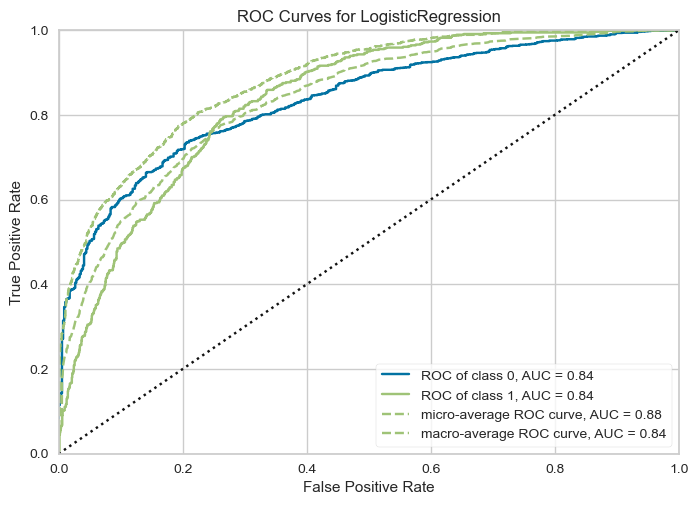

In [11]:
automl.plot_model(best_model)

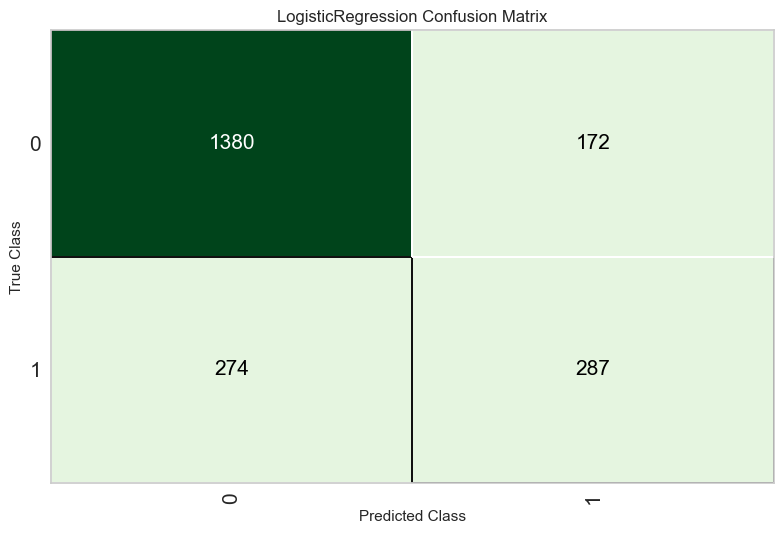

In [12]:
automl.plot_model(best_model, plot = 'confusion_matrix')

Save the model to disk

In [13]:
df.iloc[-2:-1]

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.4,306.6,Yes


In [14]:
df.iloc[-2]

tenure                         4
PhoneService                 Yes
Contract          Month-to-month
PaymentMethod       Mailed check
MonthlyCharges              74.4
TotalCharges               306.6
Churn                        Yes
Name: 8361-LTMKD, dtype: object

In [15]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,1,Yes,0.5054


In [16]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7951,0.8365,0.7951,0.7857,0.7884,0.4432,0.4468


In [17]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.850000,29.850000,0,Yes,0.5979
5575-GNVDE,34,Yes,One year,Mailed check,56.950001,1889.500000,0,No,0.9382
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.849998,108.150002,1,No,0.6098
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.299999,1840.750000,0,No,0.9406
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.699997,151.649994,1,Yes,0.6349


In [18]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                 

In [19]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [20]:
new_data = df.iloc[-2:-1]

In [21]:
new_pycaret.predict_model(loaded_model, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,1,Yes,0.5054


create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe

your Python file/function should print out the predictions for new data (new_churn_data.csv)

the true values for the new data are [1, 0, 0, 1, 0] if you're interested


In [25]:
from IPython.display import Code

Code('predict_churn.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    predictions.rename({'Label': 'prediction_label'}, axis=1, inplace=True)
    predictions['prediction_label'].replace({1: 'Churn', 0: 'No Churn'},
                                            inplace=True)
    return predictions['prediction_label']


if __name__ == "__main__":
    df = load_data(r'/Users/liz/Documents/Master Data Science/Introduction to Data Science/Week 5/new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

test your Python module and function with the new data, new_churn_data.csv

In [26]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
customerID
9305-CKSKC    Yes
1452-KNGVK    Yes
6723-OKKJM     No
7832-POPKP     No
6348-TACGU    Yes
Name: prediction_label, dtype: object


# Summary

In this week's assignment, I began by importing churn data in CSS format. Next, I verified my Python program's version, confirming it as 3.9. I then established a new environment named "Int5roDs" to install PyCaret. Subsequently, I configured an automated machine learning process, culminating in the identification of the best-performing model: logistic regression, achieving an accuracy of 0.7955.

The confusion matrix revealed 172 false positives and 274 false negatives. Following this, I saved the trained model and proceeded to test it using a Python script/module that accepts a Pandas DataFrame as input and returns churn probability for each row.

Comparing the model's predictions (1, 1, 0, 0, 1) with true values (1, 0, 0, 1, 0), it is evident that the model is not flawless, exhibiting two false positives and one false negative.